In [77]:
import pandas as pd
from pathlib import Path
import yfinance as yf
import numpy as np
import csv
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [105]:
df_50 = pd.read_csv(
    Path("./Data/QM_50.csv")
)

In [107]:
tickers = list(df_50["Tickers"])

In [420]:
historical = yf.Ticker("PWR").history(period="2y")

In [401]:
price_3month = historical.loc["2021-02":"2021-04"]
price_3month["return"] = price_3month["Close"].pct_change()
price_3month.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,return
Date,,,,,,,,
2021-02-01,71.464545,73.002491,70.376002,72.782784,1458700,0.0,0,NaN
2021-02-02,73.831386,76.687572,73.461877,75.718864,1320800,0.0,0,0.040340
2021-02-03,75.529114,75.529114,73.961208,74.021133,861300,0.0,0,-0.022422
2021-02-04,74.160946,75.329384,73.611677,75.209541,929500,0.0,0,0.016055
2021-02-05,76.038443,76.108349,74.700234,75.848694,687000,0.0,0,0.008498


In [402]:
lags = 5

In [403]:
cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    price_3month[col] = price_3month['Close'].shift(lag)
    cols.append(col)
price_3month.dropna(inplace=True)
price_3month

,Open,High,Low,Close,Volume,Dividends,Stock Splits,return,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,,,,,,,,
2021-02-08,76.647623,76.967196,75.978519,76.477852,852700,0.00,0,0.008295,75.848694,75.209541,74.021133,75.718864,72.782784
2021-02-09,76.547759,77.786103,75.998490,77.067062,773000,0.00,0,0.007704,76.477852,75.848694,75.209541,74.021133,75.718864
2021-02-10,77.336714,77.336714,76.048433,76.118340,848800,0.00,0,-0.012310,77.067062,76.477852,75.848694,75.209541,74.021133
2021-02-11,76.467864,78.425249,76.018468,76.907280,876100,0.00,0,0.010365,76.118340,77.067062,76.477852,75.848694,75.209541
2021-02-12,76.597691,77.945896,76.457878,77.766136,637300,0.00,0,0.011167,76.907280,76.118340,77.067062,76.477852,75.848694
2021-02-16,78.644956,79.443892,77.236833,77.506477,629300,0.00,0,-0.003339,77.766136,76.907280,76.118340,77.067062,76.477852
2021-02-17,77.256816,77.915931,75.918599,76.727524,604800,0.00,0,-0.010050,77.506477,77.766136,76.907280,76.118340,77.067062
2021-02-18,76.258149,76.397961,73.801431,75.778786,793900,0.00,0,-0.012365,76.727524,77.506477,77.766136,76.907280,76.118340
2021-02-19,76.497823,77.676249,76.318063,77.146957,802700,0.00,0,0.018055,75.778786,76.727524,77.506477,77.766136,76.907280


In [404]:
sum_ret = np.zeros(63)
for ticker in tickers:
    df_price = yf.Ticker(ticker).history(period="2y")
    df_price_3month = df_price.loc["2021-02":"2021-04"]
    df_price_3month["return"] = df_price_3month["Close"].pct_change()
    cum_ret = weighting * np.array((1 + df_price_3month["return"]).cumprod())
    sum_ret = sum_ret + cum_ret
    print(ticker, cum_ret[-1])

PWR 0.026538166216534213
TRMB 0.02421736518661824
ENPH 0.014945798297376543
IDXX 0.02229763109800747
AES 0.022548170744512454
CPRT 0.02246256565952145
TT 0.02444604079193229
FDX 0.024332540344888895
TTWO 0.017455957275998638
TEL 0.021676619404143782
XYL 0.022846181439970473
HWM 0.02551696635498839
PTC 0.019115328823562955
FCX 0.02677579527250971
NWSA 0.02715614906404981
WY 0.024324324161116656
PKI 0.01707343500899863
TWTR 0.020972275495901586
TSLA 0.01689525022335563
NWS 0.025980563663937906
CZR 0.027638415853277705
DE 0.02544466612673594
ISRG 0.023186929996451305
HON 0.02291136113795963
URI 0.025264530460285522
MS 0.024501471526833973
VIAC 0.015721161855254916
PAYC 0.01939260899613066
SIVB 0.025051147509203994
ZBRA 0.024550877442806162
ALB 0.02026828728833709
AAPL 0.01962970950367702
CAT 0.02480956295508654
TPR 0.03004709384302057
MPWR 0.019678626608870577
APTV 0.02073791092592818
EXPE 0.027687351375142874
TGT 0.022661528620731446
NTAP 0.022754188517547992
DXC 0.02581176458620561
CARR

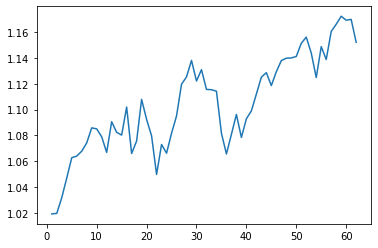

In [405]:
plt.plot(sum_ret)

# Lagged Price Machine Learning Testing

In [406]:
df1_50 = pd.read_csv(
    Path("./Data/QM_50_6month.csv")
)

In [407]:
tickers = list(df1_50["Tickers"])

In [1397]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [1002]:
historical = yf.Ticker("idxx").history(period="max")
historical["return"] = historical["Close"].pct_change()

lags = 5

cols = []
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    historical[col] = historical['Close'].shift(lag)
    cols.append(col)
historical_train = historical.loc[:"2021-01"]
historical_train.dropna(inplace=True)
historical_train

,Open,High,Low,Close,Volume,Dividends,Stock Splits,return,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,,,,,,,,
1991-06-28,0.906250,0.914063,0.906250,0.906250,1560000,0,0.0,0.000000,0.906250,0.906250,0.906250,0.906250,0.945313
1991-07-01,0.914063,0.937500,0.906250,0.929688,233600,0,0.0,0.025863,0.906250,0.906250,0.906250,0.906250,0.906250
1991-07-02,0.929688,0.929688,0.882813,0.906250,1380800,0,0.0,-0.025211,0.929688,0.906250,0.906250,0.906250,0.906250
1991-07-03,0.882813,0.898438,0.875000,0.875000,572800,0,0.0,-0.034483,0.906250,0.929688,0.906250,0.906250,0.906250
1991-07-05,0.875000,0.875000,0.875000,0.875000,78400,0,0.0,0.000000,0.875000,0.906250,0.929688,0.906250,0.906250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-25,492.470001,495.970001,482.089996,489.209991,349600,0,0.0,-0.007406,492.859985,496.440002,495.040009,484.929993,489.459991
2021-01-26,488.350006,488.350006,476.329987,478.100006,346900,0,0.0,-0.022710,489.209991,492.859985,496.440002,495.040009,484.929993
2021-01-27,474.859985,475.809998,455.230011,465.179993,583100,0,0.0,-0.027024,478.100006,489.209991,492.859985,496.440002,495.040009


In [1003]:
price_3month = historical.loc["2021-02":"2021-04"]
display(price_3month.head())

,Open,High,Low,Close,Volume,Dividends,Stock Splits,return,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,,,,,,,,
2021-02-01,483.019989,497.649994,479.369995,492.420013,573000,0,0.0,0.028704,478.679993,482.269989,465.179993,478.100006,489.209991
2021-02-02,504.339996,522.900024,502.000000,506.649994,702000,0,0.0,0.028898,492.420013,478.679993,482.269989,465.179993,478.100006
2021-02-03,504.170013,507.630005,484.149994,485.359985,605200,0,0.0,-0.042021,506.649994,492.420013,478.679993,482.269989,465.179993
2021-02-04,487.910004,495.119995,486.029999,494.000000,440600,0,0.0,0.017801,485.359985,506.649994,492.420013,478.679993,482.269989
2021-02-05,496.290009,506.000000,495.010010,502.640015,299200,0,0.0,0.017490,494.000000,485.359985,506.649994,492.420013,478.679993


In [1004]:
model = LogisticRegression(C=1e6, solver="lbfgs",
                          multi_class="auto",
                          max_iter=1000)

In [1005]:
model.fit(historical_train[cols],np.sign(historical_train["return"]))

LogisticRegression(C=1000000.0, max_iter=1000)

In [1006]:
price_3month["prediction"] = model.predict(price_3month[cols])
price_3month["prediction"].value_counts()

 1.0    59
-1.0     4
Name: prediction, dtype: int64

In [1007]:
price_3month["prediction"].value_counts()

 1.0    59
-1.0     4
Name: prediction, dtype: int64

In [1008]:
print(classification_report(price_3month["prediction"],
                           np.sign(price_3month["return"])))

              precision    recall  f1-score   support

        -1.0       0.14      1.00      0.24         4
         1.0       1.00      0.58      0.73        59

    accuracy                           0.60        63
   macro avg       0.57      0.79      0.49        63
weighted avg       0.95      0.60      0.70        63



In [1009]:
price_3month["strategy"] = price_3month["prediction"] * price_3month["return"]

<AxesSubplot:xlabel='Date'>

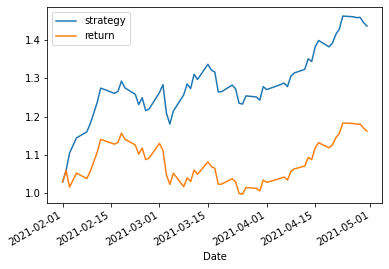

In [1010]:
price_3month[["strategy","return"]].cumsum().apply(np.exp).plot()

## SVC

In [1011]:
poly_kernel_svm_clf = Pipeline([
     ("scaler", StandardScaler()),
     ("svm_clf", SVC())
     ])

In [1012]:
poly_kernel_svm_clf.fit(historical_train[cols],np.sign(historical_train["return"]))

Pipeline(steps=[('scaler', StandardScaler()), ('svm_clf', SVC())])

In [1013]:
price_3month["prediction"] = model.predict(price_3month[cols])
price_3month["prediction"].value_counts()

 1.0    59
-1.0     4
Name: prediction, dtype: int64

In [1014]:
print(classification_report(price_3month["prediction"],
                           np.sign(price_3month["return"])))

              precision    recall  f1-score   support

        -1.0       0.14      1.00      0.24         4
         1.0       1.00      0.58      0.73        59

    accuracy                           0.60        63
   macro avg       0.57      0.79      0.49        63
weighted avg       0.95      0.60      0.70        63



<AxesSubplot:xlabel='Date'>

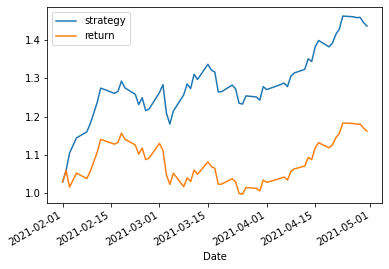

In [1015]:
price_3month["strategy"] = price_3month["prediction"] * price_3month["return"]
price_3month[["strategy","return"]].cumsum().apply(np.exp).plot()

In [1441]:
lags = 21

weighting = 1/50

strat = np.zeros(63)

actual = np.zeros(63)

for ticker in tickers:
    # Pull the historical data
    df_price = yf.Ticker(ticker).history(period="max")
    df_price["return"] = df_price["Close"].pct_change()
    
    # Create lags price
    cols = []
    for lag in range(1, lags + 1):
        col = f'lag_{lag}'
        df_price[col] = df_price['Close'].shift(lag)
        cols.append(col)
        
    df_price.dropna(inplace=True)
    
    # Create train and test data
    df_price_train = df_price.loc[:"2020-12"]
    
    df_price_test = df_price.loc["2021-02":"2021-04"]
    
    model = LogisticRegression(C=1e-2, solver="lbfgs",
                              multi_class="auto",
                              max_iter=1000)
    
    model.fit(df_price_train[cols], np.sign(df_price_train["return"]))
    
    df_price_test["prediction"] = model.predict(df_price_test[cols])
    
    df_price_test["strategy"] = df_price_test["prediction"] * df_price_test["return"]
    
    cum_ret = df_price_test[["strategy","return"]].cumsum().apply(np.exp)
    
    strat = strat + np.array(cum_ret["strategy"]) * weighting
    
    actual = actual + np.array(cum_ret["return"]) * weighting
    
    print(ticker, cum_ret)
    

PWR             strategy    return
Date                          
2021-02-01  1.034790  1.034790
2021-02-02  1.077388  1.077388
2021-02-03  1.053500  1.053500
2021-02-04  1.070550  1.070550
2021-02-05  1.079687  1.079687
...              ...       ...
2021-04-26  1.176796  1.402189
2021-04-27  1.182349  1.408805
2021-04-28  1.186329  1.404078
2021-04-29  1.197169  1.416907
2021-04-30  1.171976  1.387090

[63 rows x 2 columns]
TRMB             strategy    return
Date                          
2021-02-01  1.027842  1.027842
2021-02-02  1.075828  1.075828
2021-02-03  1.072642  1.072642
2021-02-04  1.060106  1.085327
2021-02-05  1.047712  1.098166
...              ...       ...
2021-04-26  1.547791  1.295104
2021-04-27  1.548895  1.294180
2021-04-28  1.559990  1.284976
2021-04-29  1.556257  1.288059
2021-04-30  1.525681  1.262753

[63 rows x 2 columns]
ENPH             strategy    return
Date                          
2021-02-01  0.978357  1.022122
2021-02-02  0.945883  1.057213
2021-02-03

KeyboardInterrupt: 

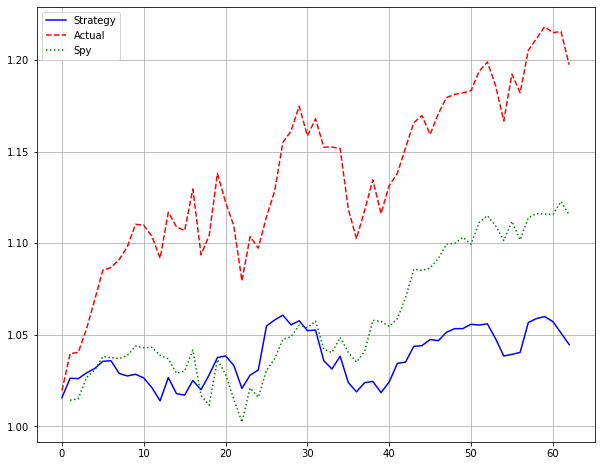

In [1142]:
spy = np.array(yf.Ticker("spy").history(period="2y").loc["2021-02":"2021-04"]["Close"].pct_change().cumsum().apply(np.exp))

plt.figure(figsize=(10,8))
plt.plot(strat,'b-', label="Strategy")
plt.plot(actual,'r--', label="Actual")
plt.plot(spy,'g:', label="Spy")
plt.grid()
plt.legend()

In [1049]:
spy

Date
2021-02-01         NaN
2021-02-02    1.014241
2021-02-03    1.015038
2021-02-04    1.026641
2021-02-05    1.030690
                ...   
2021-04-26    1.116164
2021-04-27    1.115923
2021-04-28    1.115603
2021-04-29    1.122735
2021-04-30    1.115382
Name: Close, Length: 63, dtype: float64

## SMA

In [1340]:
%%time
short_win = 5
long_win = 15

weighting = 1/50

strat = np.zeros(63)

actual = np.zeros(63)

for ticker in tickers:
    
    historical = yf.Ticker(ticker).history(period="max")
    historical["return"] = historical["Close"].pct_change()
    historical["SMA_short"] = historical["Close"].rolling(window=short_win).mean().shift()
    historical["SMA_long"] = historical["Close"].rolling(window=long_win).mean().shift()
    historical["distance1"] = (historical["Close"] - historical["SMA_short"]).shift()
    historical["distance2"] = (historical["SMA_short"] - historical["SMA_long"]).shift()
    historical["distance3"] = (historical["Close"] - historical["SMA_long"]).shift()
    
    historical.dropna(inplace=True)
    
    historical_train = historical.loc["2020-06":"2020"].copy()
    historical_test = historical.loc["2021-02":"2021-04"].copy()
    
    scaler = StandardScaler()
    X_scaler = scaler.fit(historical_train[["SMA_short","SMA_long","distance1","distance2","distance3"]])
    X_train_scaled = X_scaler.transform(historical_train[["SMA_short","SMA_long","distance1","distance2","distance3"]])
    X_test_scaled = X_scaler.transform(historical_test[["SMA_short","SMA_long","distance1","distance2","distance3"]])
    
    svm_model = SVC()
    svm_model = svm_model.fit(X_train_scaled, np.sign(historical_train[["return"]]))
    
    historical_test["prediction"] = svm_model.predict(X_test_scaled)
    
    historical_test["strategy"] = historical_test["prediction"] * historical_test["return"]
    
    cum_ret = historical_test[["strategy","return"]].cumsum().apply(np.exp)
    
    strat = strat + np.array(cum_ret["strategy"]) * weighting
    
    actual = actual + np.array(cum_ret["return"]) * weighting
    
    print(ticker, cum_ret)

PWR             strategy    return
Date                          
2021-02-01  1.034790  1.034790
2021-02-02  1.077388  1.077388
2021-02-03  1.053500  1.053500
2021-02-04  1.070550  1.070550
2021-02-05  1.079687  1.079687
...              ...       ...
2021-04-26  1.341661  1.402189
2021-04-27  1.347991  1.408805
2021-04-28  1.343468  1.404078
2021-04-29  1.355743  1.416907
2021-04-30  1.327214  1.387090

[63 rows x 2 columns]
TRMB             strategy    return
Date                          
2021-02-01  1.027842  1.027842
2021-02-02  1.075828  1.075828
2021-02-03  1.072642  1.072642
2021-02-04  1.085327  1.085327
2021-02-05  1.098166  1.098166
...              ...       ...
2021-04-26  1.295104  1.295104
2021-04-27  1.294180  1.294180
2021-04-28  1.284976  1.284976
2021-04-29  1.288059  1.288059
2021-04-30  1.262753  1.262753

[63 rows x 2 columns]
ENPH             strategy    return
Date                          
2021-02-01  1.022122  1.022122
2021-02-02  1.057213  1.057213
2021-02-03

DE             strategy    return
Date                          
2021-02-01  1.011877  1.011877
2021-02-02  1.048289  1.048289
2021-02-03  1.043449  1.043449
2021-02-04  1.072003  1.072003
2021-02-05  1.071899  1.071899
...              ...       ...
2021-04-26  1.351622  1.337211
2021-04-27  1.358424  1.343942
2021-04-28  1.349360  1.334974
2021-04-29  1.337299  1.323041
2021-04-30  1.317760  1.303710

[63 rows x 2 columns]
ISRG             strategy    return
Date                          
2021-02-01  0.997956  0.997956
2021-02-02  1.013769  1.013769
2021-02-03  0.997264  0.997264
2021-02-04  1.012973  1.012973
2021-02-05  1.019954  1.019954
...              ...       ...
2021-04-26  1.150873  1.173796
2021-04-27  1.144828  1.167631
2021-04-28  1.154719  1.177719
2021-04-29  1.147340  1.170192
2021-04-30  1.149708  1.172608

[63 rows x 2 columns]
HON             strategy    return
Date                          
2021-02-01  1.000973  1.000973
2021-02-02  1.024588  1.024588
2021-02-03  

UAA             strategy    return
Date                          
2021-02-01  1.028396  1.028396
2021-02-02  0.995769  1.062092
2021-02-03  0.947638  1.116035
2021-02-04  0.985826  1.161009
2021-02-05  1.007471  1.186500
...              ...       ...
2021-04-26  0.957319  1.368232
2021-04-27  0.984982  1.407768
2021-04-28  0.978488  1.398488
2021-04-29  0.994085  1.420778
2021-04-30  0.990021  1.414970

[63 rows x 2 columns]
LRCX             strategy    return
Date                          
2021-02-01  1.036823  1.036823
2021-02-02  1.067497  1.067497
2021-02-03  1.092059  1.043486
2021-02-04  1.125474  1.075415
2021-02-05  1.104507  1.055380
...              ...       ...
2021-04-26  0.930544  1.385711
2021-04-27  0.933021  1.389400
2021-04-28  0.923192  1.374762
2021-04-29  0.927426  1.381068
2021-04-30  0.898206  1.337555

[63 rows x 2 columns]
UPS             strategy    return
Date                          
2021-02-01  1.008162  1.008162
2021-02-02  1.034501  1.034501
2021-02-03 

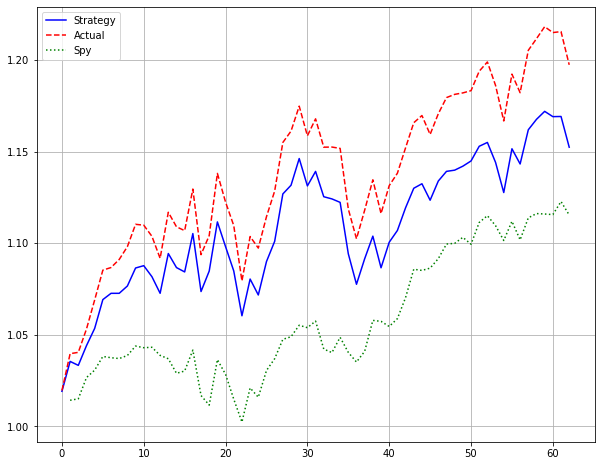

In [1341]:
spy = np.array(yf.Ticker("spy").history(period="2y").loc["2021-02":"2021-04"]["Close"].pct_change().cumsum().apply(np.exp))

plt.figure(figsize=(10,8))
plt.plot(strat,'b-', label="Strategy")
plt.plot(actual,'r--', label="Actual")
plt.plot(spy,'g:', label="Spy")
plt.grid()
plt.legend()

## EMA

In [1434]:
short_win = 12
long_win = 26

strat = np.zeros(63)

actual = np.zeros(63)

for ticker in tickers:
    historical = yf.Ticker(ticker).history(period="2y")
    historical["return"] = historical["Close"].pct_change()
    historical["exp1"] = historical["Close"].ewm(span=short_win, adjust=False).mean().shift()
    historical["exp2"] = historical["Close"].ewm(span=long_win, adjust=False).mean().shift()
    historical["distance1"] = (historical["Close"] - historical["exp1"]).shift()
    historical["distance2"] = (historical["Close"] - historical["exp2"]).shift()
    #historical["distance3"] = (historical["exp1"] - historical["exp2"]).shift()
    historical.dropna(inplace=True)
    
    historical_train = historical.loc["2020-07":"2020"].copy()
    historical_test = historical.loc["2021-02":"2021-04"].copy()
    
    scaler = StandardScaler()
    X_scaler = scaler.fit(historical_train[["exp1","exp2","distance1","distance2"]])
    X_train_scaled = X_scaler.transform(historical_train[["exp1","exp2","distance1","distance2"]])
    X_test_scaled = X_scaler.transform(historical_test[["exp1","exp2","distance1","distance2"]])
    
    svm_model = SVC(C=0.5)
    svm_model = svm_model.fit(X_train_scaled, np.sign(historical_train[["return"]]))
    
    historical_test["prediction"] = svm_model.predict(X_test_scaled)
    
    historical_test["strategy"] = historical_test["prediction"] * historical_test["return"]
    
    cum_ret = historical_test[["strategy","return"]].cumsum().apply(np.exp)
    
    strat = strat + np.array(cum_ret["strategy"]) * weighting
    
    actual = actual + np.array(cum_ret["return"]) * weighting
    
    print(ticker, cum_ret)

PWR             strategy    return
Date                          
2021-02-01  1.034790  1.034790
2021-02-02  1.077388  1.077388
2021-02-03  1.053500  1.053500
2021-02-04  1.070550  1.070550
2021-02-05  1.079687  1.079687
...              ...       ...
2021-04-26  1.402189  1.402189
2021-04-27  1.408805  1.408805
2021-04-28  1.404078  1.404078
2021-04-29  1.416907  1.416907
2021-04-30  1.387090  1.387090

[63 rows x 2 columns]
TRMB             strategy    return
Date                          
2021-02-01  1.027842  1.027842
2021-02-02  1.075828  1.075828
2021-02-03  1.072642  1.072642
2021-02-04  1.085327  1.085327
2021-02-05  1.098166  1.098166
...              ...       ...
2021-04-26  1.295104  1.295104
2021-04-27  1.294180  1.294180
2021-04-28  1.284976  1.284976
2021-04-29  1.288059  1.288059
2021-04-30  1.262753  1.262753

[63 rows x 2 columns]
ENPH             strategy    return
Date                          
2021-02-01  1.022122  1.022122
2021-02-02  1.057213  1.057213
2021-02-03

DE             strategy    return
Date                          
2021-02-01  1.011877  1.011877
2021-02-02  1.048289  1.048289
2021-02-03  1.043449  1.043449
2021-02-04  1.072003  1.072003
2021-02-05  1.071899  1.071899
...              ...       ...
2021-04-26  1.337211  1.337211
2021-04-27  1.343942  1.343942
2021-04-28  1.334974  1.334974
2021-04-29  1.323041  1.323041
2021-04-30  1.303710  1.303710

[63 rows x 2 columns]
ISRG             strategy    return
Date                          
2021-02-01  0.997956  0.997956
2021-02-02  1.013769  1.013769
2021-02-03  0.997264  0.997264
2021-02-04  1.012973  1.012973
2021-02-05  1.019954  1.019954
...              ...       ...
2021-04-26  1.173796  1.173796
2021-04-27  1.167631  1.167631
2021-04-28  1.177719  1.177719
2021-04-29  1.170192  1.170192
2021-04-30  1.172608  1.172608

[63 rows x 2 columns]
HON             strategy    return
Date                          
2021-02-01  1.000973  1.000973
2021-02-02  1.024588  1.024588
2021-02-03  

UAA             strategy    return
Date                          
2021-02-01  1.028396  1.028396
2021-02-02  0.995769  1.062092
2021-02-03  0.947638  1.116035
2021-02-04  0.910929  1.161009
2021-02-05  0.930929  1.186500
...              ...       ...
2021-04-26  1.073516  1.368232
2021-04-27  1.104537  1.407768
2021-04-28  1.097255  1.398488
2021-04-29  1.114744  1.420778
2021-04-30  1.110187  1.414970

[63 rows x 2 columns]
LRCX             strategy    return
Date                          
2021-02-01  1.036823  1.036823
2021-02-02  1.007030  1.067497
2021-02-03  1.030201  1.043486
2021-02-04  0.999615  1.075415
2021-02-05  1.018591  1.055380
...              ...       ...
2021-04-26  1.135584  1.385711
2021-04-27  1.132568  1.389400
2021-04-28  1.144627  1.374762
2021-04-29  1.139401  1.381068
2021-04-30  1.176468  1.337555

[63 rows x 2 columns]
UPS             strategy    return
Date                          
2021-02-01  1.008162  1.008162
2021-02-02  1.034501  1.034501
2021-02-03 

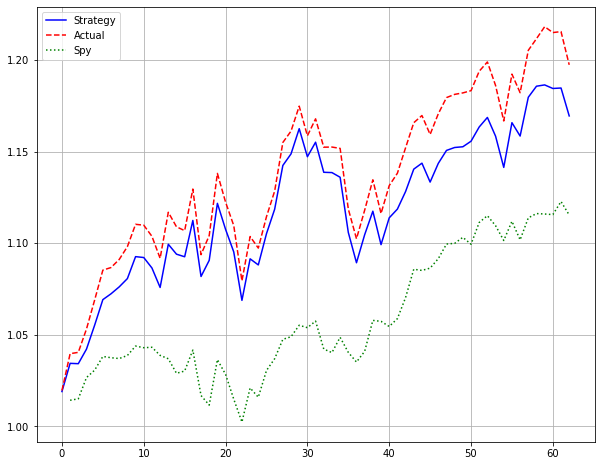

In [1435]:
spy = np.array(yf.Ticker("spy").history(period="2y").loc["2021-02":"2021-04"]["Close"].pct_change().cumsum().apply(np.exp))

plt.figure(figsize=(10,8))
plt.plot(strat,'b-', label="Strategy")
plt.plot(actual,'r--', label="Actual")
plt.plot(spy,'g:', label="Spy")
plt.grid()
plt.legend()

# MACD

In [1442]:
short_win = 12
long_win = 26
signal_line = 9
strat = np.zeros(63)

actual = np.zeros(63)

for ticker in tickers:
    historical = yf.Ticker(ticker).history(period="2y")
    historical["return"] = historical["Close"].pct_change()
    historical["exp1"] = historical["Close"].ewm(span=short_win, adjust=False).mean().shift()
    historical["exp2"] = historical["Close"].ewm(span=long_win, adjust=False).mean().shift()
    historical["macd"] = historical["exp1"] - historical["exp2"]
    historical["exp3"] = historical["Close"].ewm(span=signal_line, adjust=False).mean().shift()
    historical["macd_histogram"] = historical["macd"] - historical["exp3"]
    historical["lag_1"] = historical["Close"].shift()
    historical["roc"] = ((historical["Close"] - historical["lag_1"])/ historical["lag_1"]).shift()
    historical["macd_histogram_lag1"] = historical["macd_histogram"].shift()
    historical["roc_macd"] = ((historical["macd_histogram"]-historical["macd_histogram_lag1"])/historical["macd_histogram_lag1"])
    historical.dropna(inplace=True)
    
    historical_train = historical.loc[:"2020"].copy()
    historical_test = historical.loc["2021-02":"2021-04"].copy()
    
    scaler = StandardScaler()
    X_scaler = scaler.fit(historical_train[["roc","roc_macd"]])
    X_train_scaled = X_scaler.transform(historical_train[["roc","roc_macd"]])
    X_test_scaled = X_scaler.transform(historical_test[["roc","roc_macd"]])
    
    svm_model = SVC(C=0.5)
    svm_model = svm_model.fit(X_train_scaled, np.sign(historical_train[["return"]]))
    
    historical_test["prediction"] = svm_model.predict(X_test_scaled)
    
    historical_test["strategy"] = historical_test["prediction"] * historical_test["return"]
    
    cum_ret = historical_test[["strategy","return"]].cumsum().apply(np.exp)
    
    strat = strat + np.array(cum_ret["strategy"]) * weighting
    
    actual = actual + np.array(cum_ret["return"]) * weighting
    
    print(ticker, accuracy_score(historical_test["prediction"],
                                np.sign(historical_test["return"])))

PWR 0.6507936507936508
TRMB 0.6349206349206349
ENPH 0.5238095238095238
IDXX 0.5396825396825397
AES 0.6190476190476191
CPRT 0.5079365079365079
TT 0.6349206349206349
FDX 0.47619047619047616
TTWO 0.4603174603174603
TEL 0.4603174603174603
XYL 0.5238095238095238
HWM 0.6031746031746031
PTC 0.5555555555555556
FCX 0.5238095238095238
NWSA 0.5873015873015873
WY 0.5555555555555556
PKI 0.5238095238095238
TWTR 0.4603174603174603
TSLA 0.47619047619047616
NWS 0.5079365079365079
CZR 0.6190476190476191
DE 0.5396825396825397
ISRG 0.5555555555555556
HON 0.6031746031746031
URI 0.5873015873015873
MS 0.6190476190476191
VIAC 0.6507936507936508
PAYC 0.5396825396825397
SIVB 0.47619047619047616
ZBRA 0.4444444444444444
ALB 0.6031746031746031
AAPL 0.5079365079365079
CAT 0.6666666666666666
TPR 0.6031746031746031
MPWR 0.5079365079365079
APTV 0.5396825396825397
EXPE 0.5873015873015873
TGT 0.5555555555555556
NTAP 0.6031746031746031
DXC 0.5238095238095238
CARR 0.5555555555555556
UAA 0.5714285714285714
LRCX 0.603174603

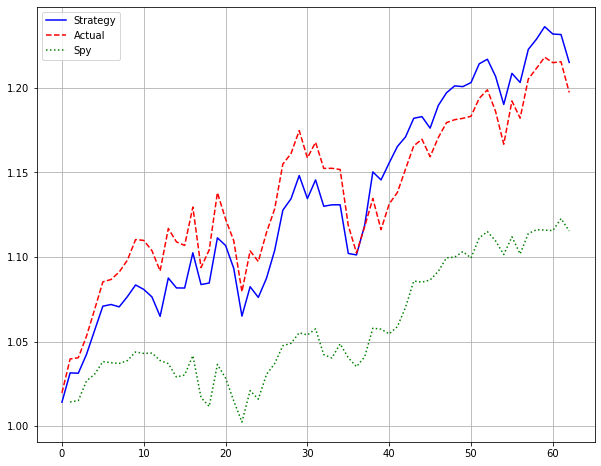

In [1443]:
spy = np.array(yf.Ticker("spy").history(period="2y").loc["2021-02":"2021-04"]["Close"].pct_change().cumsum().apply(np.exp))

plt.figure(figsize=(10,8))
plt.plot(strat,'b-', label="Strategy")
plt.plot(actual,'r--', label="Actual")
plt.plot(spy,'g:', label="Spy")
plt.grid()
plt.legend()